In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error as mse
from datetime import datetime, timedelta
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ARIMA, MSTL, SeasonalNaive, Naive, AutoETS, AutoCES, AutoTheta, SimpleExponentialSmoothing, SimpleExponentialSmoothingOptimized, SeasonalExponentialSmoothingOptimized
from statsforecast.arima import arima_string
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error as mse

warnings.filterwarnings(
    "ignore",
    message="'force_all_finite' was renamed to 'ensure_all_finite'",
    category=FutureWarning,
    module="sklearn.utils.deprecation"
)
df=pd.read_csv('PEMS-BAY.csv',parse_dates=[0],index_col=[0])
df_fill=df.reindex(pd.date_range('2017-03-12 02:00:00', '2017-03-12 03:00:00', freq='5min'),method='ffill')
df=df_fill.combine_first(df)
df

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30 23:35:00,70.9,66.3,68.4,61.0,61.8,66.9,66.0,67.4,65.4,69.3,...,64.6,66.8,64.7,61.1,68.4,61.4,70.5,68.2,71.6,66.2
2017-06-30 23:40:00,71.3,66.6,68.7,60.9,62.0,66.2,66.5,68.2,64.9,69.1,...,65.1,67.3,64.8,60.8,69.8,62.2,69.4,68.6,71.6,68.4
2017-06-30 23:45:00,71.4,66.9,68.1,61.1,62.0,66.7,65.8,68.2,64.2,69.1,...,64.9,66.5,64.6,61.3,69.5,63.8,70.6,68.4,71.6,66.6
2017-06-30 23:50:00,72.2,66.5,68.0,61.1,62.5,65.8,67.1,68.3,64.0,67.3,...,64.1,65.9,64.8,61.3,69.6,64.2,70.2,68.7,71.6,68.4


In [2]:
df_raw_all_sensors_train=df.loc['2017-02-26 00:00:00':'2017-05-06 23:55:00']
df_raw_all_sensors_valid=df.loc['2017-05-07 00:00:00':'2017-05-13 23:55:00']
df_raw_all_sensors_tv=df.loc['2017-02-26 00:00:00':'2017-05-13 23:55:00']
df_raw_all_sensors_test=df.loc['2017-05-14 00:00:00':'2017-05-27 23:55:00']
df_raw_all_sensors_train

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-02-26 00:00:00,71.0,64.9,66.6,67.7,64.5,67.4,66.6,68.5,66.2,68.0,...,68.9,65.9,67.6,62.2,64.4,62.6,70.4,68.6,69.6,67.5
2017-02-26 00:05:00,71.1,64.5,66.5,67.5,64.2,67.9,67.3,67.6,66.1,68.8,...,68.6,66.0,67.7,61.9,64.7,61.9,70.1,68.7,69.9,67.3
2017-02-26 00:10:00,71.2,64.6,66.9,67.6,64.5,66.9,66.4,67.9,66.3,67.9,...,68.5,65.3,66.5,61.6,64.7,62.0,69.6,68.4,69.6,69.3
2017-02-26 00:15:00,70.7,63.4,67.2,67.5,63.1,66.9,66.9,66.8,65.8,67.2,...,68.2,65.6,66.5,61.7,64.0,62.3,70.2,68.5,69.7,68.8
2017-02-26 00:20:00,70.7,64.1,67.3,67.6,63.8,66.2,66.6,67.7,66.2,68.1,...,68.9,66.0,67.1,62.0,64.1,62.7,70.2,68.5,70.3,69.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-06 23:35:00,71.2,65.5,67.2,19.0,70.7,68.3,67.5,68.9,66.8,67.7,...,67.6,68.0,68.0,62.5,65.5,61.9,68.7,68.4,69.9,67.7
2017-05-06 23:40:00,72.6,64.9,67.5,19.0,71.0,68.5,67.8,68.1,66.4,67.8,...,67.6,67.4,68.0,63.4,66.2,62.6,70.3,68.5,70.8,68.0
2017-05-06 23:45:00,71.8,64.8,67.4,19.0,71.3,66.8,67.9,68.4,66.9,68.5,...,67.6,66.9,68.0,63.5,68.7,60.6,69.9,68.6,70.0,69.0
2017-05-06 23:50:00,71.2,64.7,66.5,19.0,70.9,67.5,68.0,68.4,67.0,69.2,...,67.6,67.3,68.0,62.9,65.8,60.9,70.5,68.7,70.2,68.5


In [3]:
sensors_num=10
df_raw_train=df_raw_all_sensors_train.sample(n=sensors_num,axis=1,random_state=42)
df_raw_valid=df_raw_all_sensors_valid.sample(n=sensors_num,axis=1,random_state=42)
df_raw_tv=df_raw_all_sensors_tv.sample(n=sensors_num,axis=1,random_state=42)
df_raw_test=df_raw_all_sensors_test.sample(n=sensors_num,axis=1,random_state=42)
sensors=df_raw_train.columns
sensors

Index(['403412', '400799', '404553', '400069', '400687', '402367', '407323',
       '402118', '402282', '400717'],
      dtype='object')

In [4]:
df_raw_train_diff=df_raw_train.diff(2016).dropna()
df_raw_valid_diff=df_raw_valid.diff(2016).dropna()
df_raw_tv_diff=df_raw_tv.diff(2016).dropna()


In [5]:
df_raw_train.index.name='ds'
df_raw_train_diff.index.name='ds'
df_raw_valid.index.name='ds'
df_raw_valid_diff.index.name='ds'
df_raw_tv.index.name='ds'
df_raw_tv_diff.index.name='ds'
df_train=df_raw_train.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_train_diff=df_raw_train_diff.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_valid=df_raw_valid.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_valid_diff=df_raw_valid_diff.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_tv=df_raw_tv.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_tv_diff=df_raw_tv_diff.reset_index().melt(id_vars='ds',var_name='unique_id',value_name='y').sort_values(['unique_id','ds']).reset_index(drop=True)
df_train

,ds,unique_id,y
0,2017-02-26 00:00:00,400069,68.0
1,2017-02-26 00:05:00,400069,68.8
2,2017-02-26 00:10:00,400069,67.9
3,2017-02-26 00:15:00,400069,67.2
4,2017-02-26 00:20:00,400069,68.1
...,...,...,...
201595,2017-05-06 23:35:00,407323,66.7
201596,2017-05-06 23:40:00,407323,67.8
201597,2017-05-06 23:45:00,407323,67.4
201598,2017-05-06 23:50:00,407323,68.7


In [6]:
sf1 = StatsForecast(
    models=[AutoARIMA(trace=True)],
    freq='5min',
    n_jobs=-1
)

sf1.fit(df_train)

StatsForecast(models=[AutoARIMA])

In [7]:
sf2 = StatsForecast(
    models=[AutoARIMA(trace=True)],
    freq='5min',
    n_jobs=-1
)

sf2.fit(df_train_diff)

StatsForecast(models=[AutoARIMA])

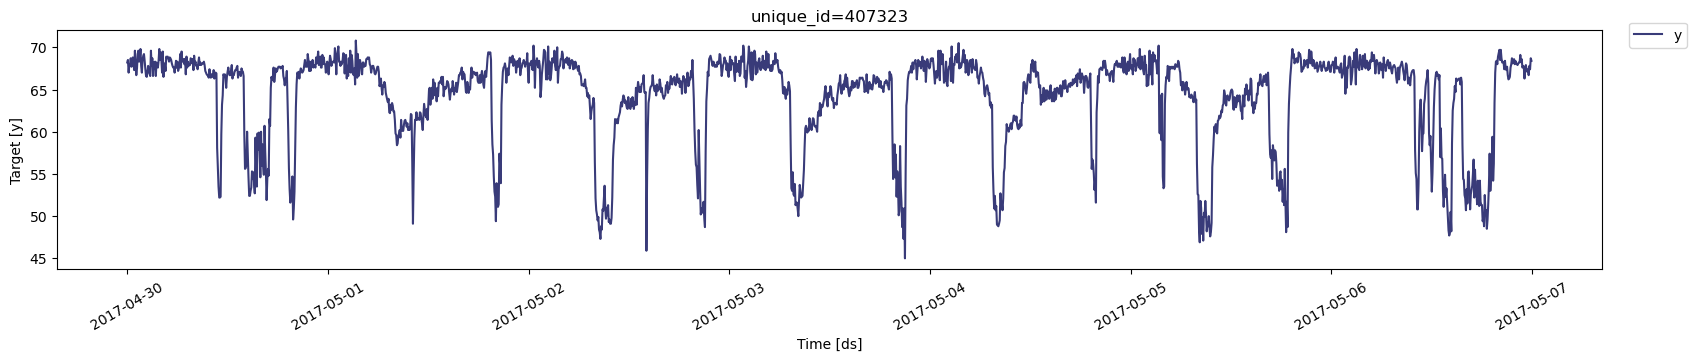

In [8]:
StatsForecast.plot(df_train.tail(2016))

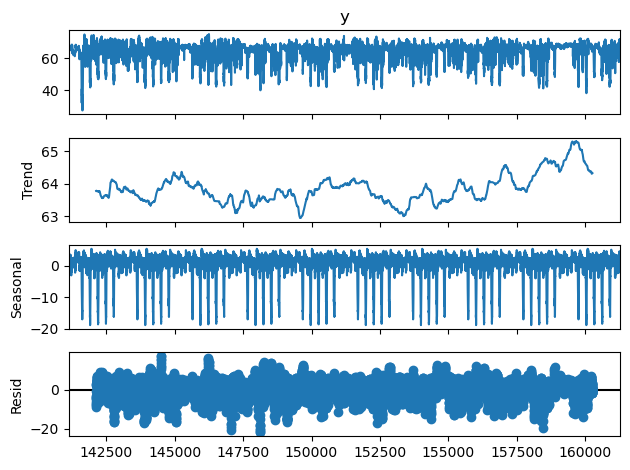

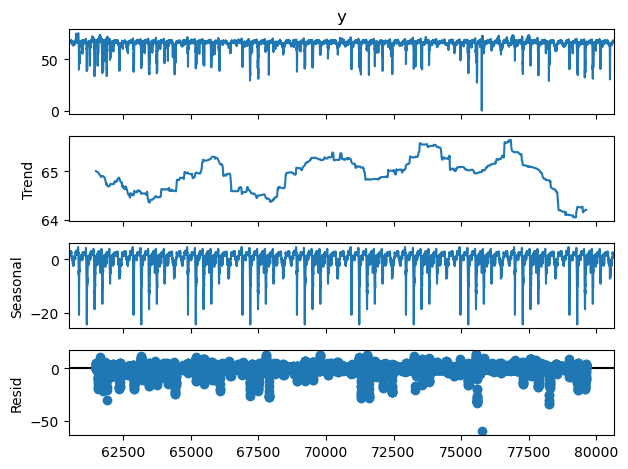

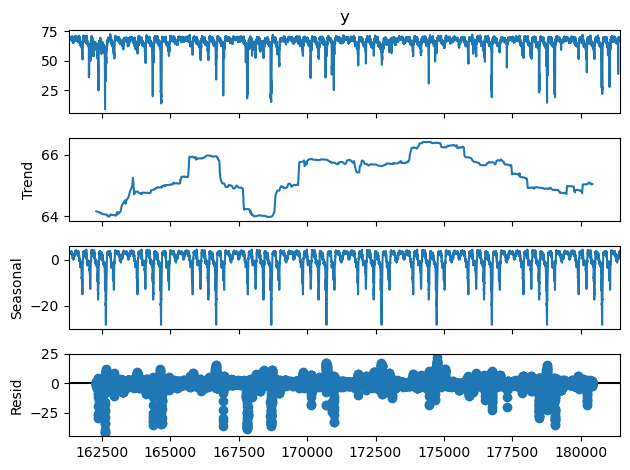

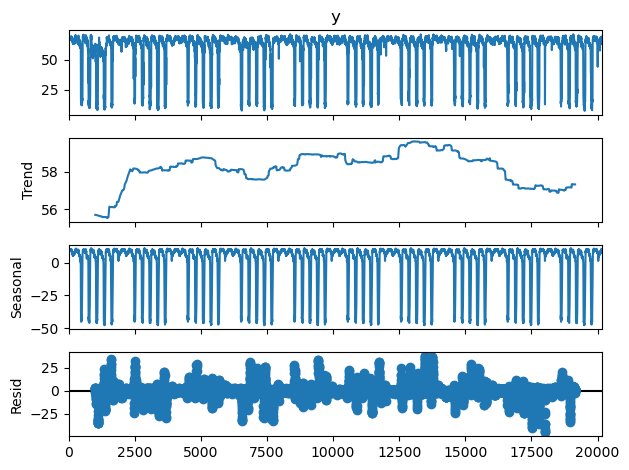

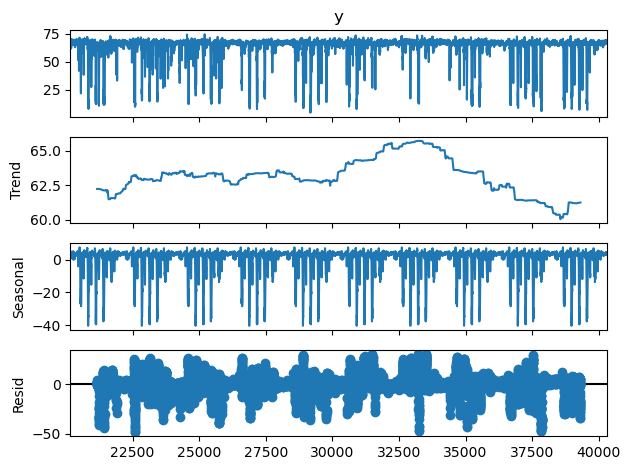

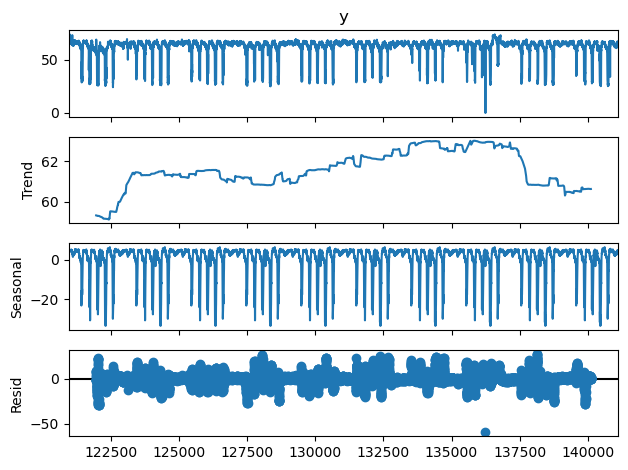

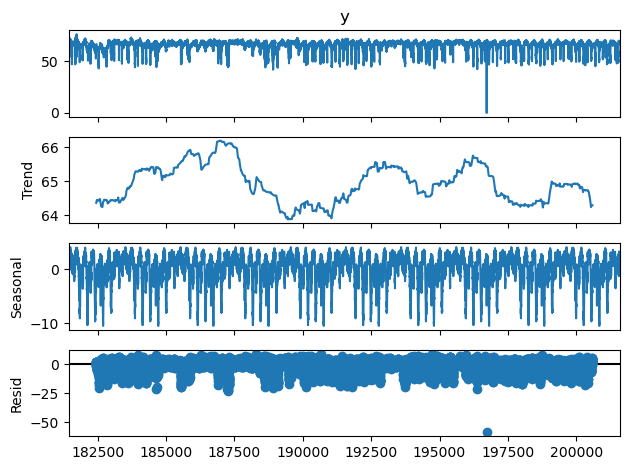

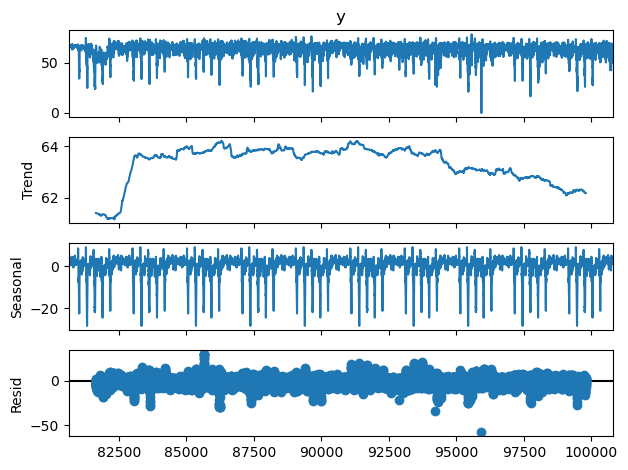

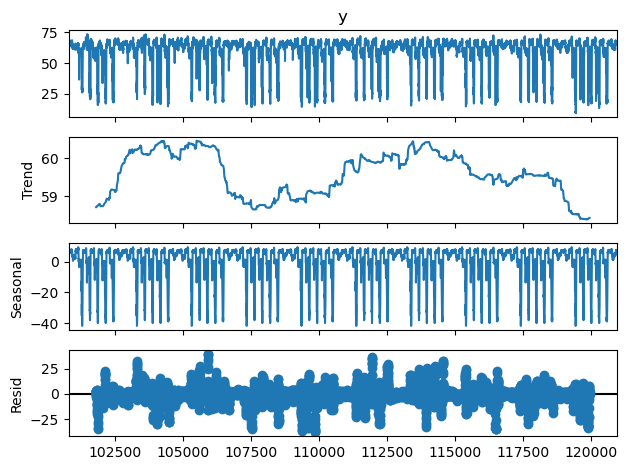

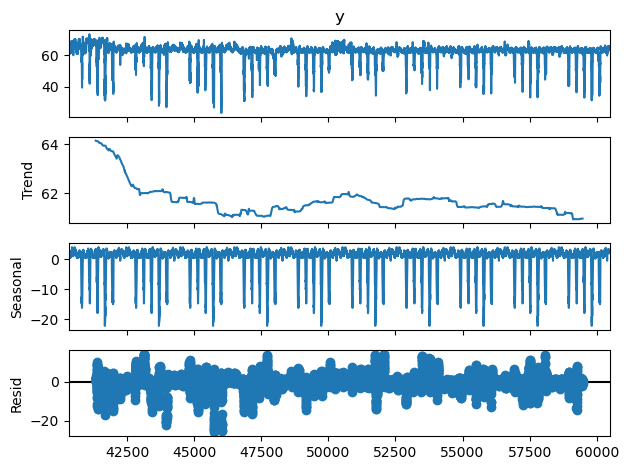

In [9]:
#fig,axis=plt.subplots(10,1,figsize=(10,15))

for sensor in sensors:
    decomposed=seasonal_decompose(df_train.loc[df_train['unique_id']==sensor]["y"], model = "add", period=2016)
    decomposed.plot()
    plt.rcParams['lines.linewidth'] = 1.5
    plt.show()

In [10]:
steps_num=12
pred_num=2016
ts=pd.to_datetime('2017-05-07 00:00:00')

In [11]:
forecasts_arima=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    model=sf1.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y
        prediction=model.forward(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_arima.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [12]:
model=Naive()
forecasts_naive=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y.values
        prediction=model.forecast(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_naive.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [13]:
model=SeasonalNaive(2016)
forecasts_s_naive=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y.values
        prediction=model.forecast(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_s_naive.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [14]:
forecasts_sarima=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    df_sensor_diff=df_tv_diff.loc[df_tv_diff['unique_id']==sensors[j]]
    model=sf2.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=df_sensor_diff.loc[pd.to_datetime(df_sensor_diff['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y
        pred_diff=model.forward(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                past=df_sensor.loc[df_sensor['ds']==ts+timedelta(minutes=5*(i+step-2016))].y.item()
                forecasts_one_sensor[i+step][step]=pred_diff[step]+past
    forecasts_sarima.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [15]:
sf3 = StatsForecast(
    models=[AutoETS()],
    freq='5min',
    n_jobs=-1
)

sf3.fit(df_train)

StatsForecast(models=[AutoETS])

In [16]:
sf4 = StatsForecast(
    models=[AutoTheta()],
    freq='5min',
    n_jobs=-1
)

sf4.fit(df_train)

StatsForecast(models=[AutoTheta])

In [17]:
sf5 = StatsForecast(
    models=[AutoTheta(decomposition_type='additive')],
    freq='5min',
    n_jobs=-1
)

sf5.fit(df_train)

StatsForecast(models=[AutoTheta])

In [18]:
sf6 = StatsForecast(
    models=[SimpleExponentialSmoothing(0.9)],
    freq='5min',
    n_jobs=-1
)

sf6.fit(df_train)

StatsForecast(models=[SES])

In [19]:
sf7 = StatsForecast(
    models=[SimpleExponentialSmoothingOptimized()],
    freq='5min',
    n_jobs=-1
)

sf7.fit(df_train)

StatsForecast(models=[SESOpt])

In [20]:
sf8 = StatsForecast(
    models=[SeasonalExponentialSmoothingOptimized(season_length=2016)],
    freq='5min',
    n_jobs=-1
)

sf8.fit(df_train)

StatsForecast(models=[SeasESOpt])

In [21]:
forecasts_ses=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    model=sf6.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=np.array(df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y)
        prediction=model.forecast(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_ses.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [22]:
forecasts_seso=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    model=sf7.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=np.array(df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y)
        prediction=model.forecast(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_seso.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [23]:
forecasts_seas_eso=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    model=sf8.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=np.array(df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y)
        prediction=model.forecast(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_seas_eso.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [70]:
forecasts_theta_a=[]
for j in range(sensors_num):
    df_sensor=df_tv.loc[df_tv['unique_id']==sensors[j]]
    model=sf5.fitted_[j, 0]
    forecasts_one_sensor=np.zeros([pred_num,steps_num])
    for i in range(pred_num):
        y_past=df_sensor.loc[pd.to_datetime(df_sensor['ds'])<=ts+timedelta(minutes=5*(i-1))].reset_index().y
        prediction=model.forward(y_past,steps_num)['mean']
        for step in range(steps_num):
            if i+step<pred_num:
                forecasts_one_sensor[i+step][step]=prediction[step]
    forecasts_theta_a.append(forecasts_one_sensor)
    print(j+1,'sensors done')

1 sensors done
2 sensors done
3 sensors done
4 sensors done
5 sensors done
6 sensors done
7 sensors done
8 sensors done
9 sensors done
10 sensors done


In [25]:
mses=[]
for j in range(sensors_num):
    mses_one_sensor=[]
    actual=df_valid.loc[df_valid['unique_id']==sensors[j]].head(pred_num).reset_index().y
    for step in range(steps_num):
        res_naive=mse(actual[step:],forecasts_naive[j][step:,step])
        res_s_naive=mse(actual[step:],forecasts_s_naive[j][step:,step])
        res_arima=mse(actual[step:],forecasts_arima[j][step:,step])
        res_seso=mse(actual[step:],forecasts_seso[j][step:,step])
        res_seas_eso=mse(actual[step:],forecasts_seas_eso[j][step:,step])
        mses_one_sensor.append([res_naive,res_s_naive,res_arima,res_seso,res_seas_eso])
    mses.append(mses_one_sensor)
mses_total=[]
for step in range(steps_num):
    res_naive=np.array(mses)[:,step,0].mean()
    res_s_naive=np.array(mses)[:,step,1].mean()
    res_arima=np.array(mses)[:,step,2].mean()
    res_seso=np.array(mses)[:,step,3].mean()
    res_seas_eso=np.array(mses)[:,step,4].mean()
    mses_total.append([res_naive,res_s_naive,res_arima,res_seso,res_seas_eso])
mses.append(mses_total)

In [27]:
for j in range(sensors_num):
    print('Sensor',j+1)
    print(pd.DataFrame(mses[j],columns=['Naive', 'Seasonal Naive', 'ARIMA', 'SESO','Seas ESO']))
print('Total')
print(pd.DataFrame(mses[sensors_num],columns=['Naive', 'Seasonal Naive', 'ARIMA', 'SESO','Seas ESO']))

Sensor 1
        Naive  Seasonal Naive      ARIMA       SESO   Seas ESO
0   11.102495       29.307197  14.931592   9.786897  21.584697
1   15.035102       29.321663  21.980236  13.353196  21.595408
2   17.860079       29.323808  26.576062  15.998513  21.596972
3   20.118639       29.333289  29.562411  18.238112  21.598664
4   22.571178       29.346750  33.144040  20.428546  21.603080
5   23.941905       29.360368  34.465590  21.987514  21.608300
6   25.914378       29.374134  36.592980  24.000541  21.611778
7   28.028049       29.386560  38.953470  26.088108  21.622478
8   29.999288       29.359955  41.006120  28.093649  21.611790
9   32.107319       29.319651  43.325734  30.144676  21.595410
10  34.230389       29.331396  45.819100  32.135223  21.606154
11  35.921202       29.345945  47.617299  33.804807  21.611780
Sensor 2
        Naive  Seasonal Naive      ARIMA       SESO  Seas ESO
0    1.141533       14.633284   1.130685   1.144074  8.574504
1    2.525082       14.640541   2.44020